In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [2]:
file = 'posts-en.csv'

In [3]:
posts = pd.read_csv(file)
print(posts.columns)
print(f'# of Posts: {posts.shape[0]}')

Index(['Unnamed: 0', 'keyword', 'title', 'author', 'body', 'time', 'date',
       'status', 'votes', 'num_comments', 'num_comment_pages', 'link', 'lang'],
      dtype='object')
# of Posts: 911


In [4]:
posts.date = posts.date.str.replace('‎','')

In [5]:
impl_posts = posts[(posts['keyword'] == 'implemented')]

# implemented & votes correlation, avg vote number of implemented posts
avg_votes = impl_posts.votes.mean()
print(f'Average # of Votes for Implemented Ideas: {avg_votes}')

# implemented & num of comments correlation, avg comment number of implemented posts
avg_comments = impl_posts.num_comments.mean()
print(f'Average # of Comments for Implemented Ideas: {avg_comments}')

# implemented & length of posts correlation, avg length of an implemented post
body_length = impl_posts.body.apply(lambda x: len(x.split()))
avg_length = body_length.mean()
print(f'Average # of Body Length for Implemented Ideas: {avg_length}')

Average # of Votes for Implemented Ideas: 1471.8449367088608
Average # of Comments for Implemented Ideas: 219.74683544303798
Average # of Body Length for Implemented Ideas: 90.29430379746836


<Axes: >

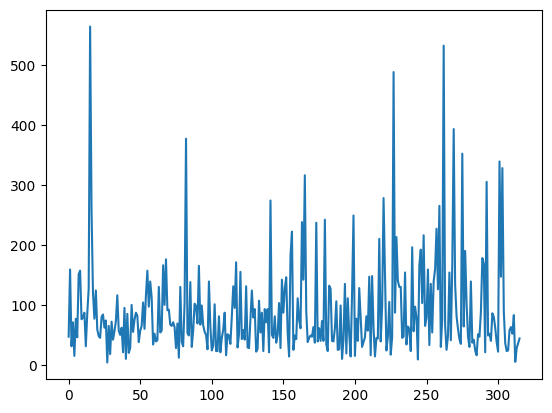

In [18]:
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot()
body_length

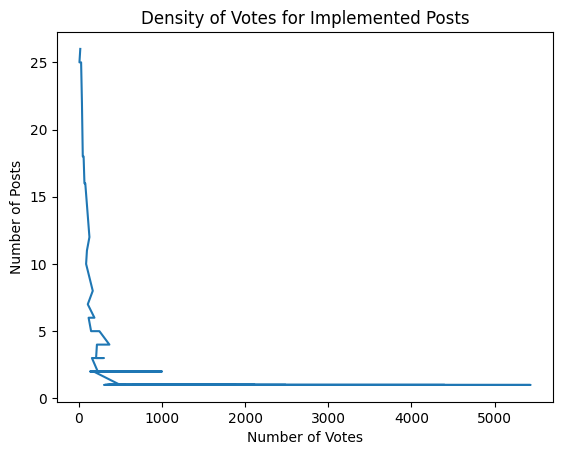

In [17]:
votes_data = impl_posts.num_comments.value_counts()
votes_d = votes_data.tolist()
votes_count = [votes_data.axes[0][i] for i in range(len(votes_data.axes[0]))]

plt.plot(votes_count, votes_d)
plt.title("Density of Votes for Implemented Posts")
plt.xlabel("Number of Votes")
plt.ylabel("Number of Posts")
plt.show()

In [7]:
all_cate_raw = posts.title.str.extractall(r'\[(.*?)\]')
all_cate_count = all_cate_raw.value_counts()
all_cate = [all_cate_count.axes[0][i][0] for i in range(len(all_cate_count.axes[0]))]

# for i in all_cate:
#     print(i)

In [118]:
cate_file = 'Categories.csv'
org_cate = pd.read_csv(cate_file)
print(org_cate.columns)

Index(['Original', 'Platform', 'Feature'], dtype='object')


In [22]:
org_cate.head(5)

,Original,Platform,Feature
0,Desktop,Desktop,No
1,Mobile,Mobile,No
2,Playlists,All,No
3,All Platforms,All,No
4,Other,No,No


In [17]:
unfiltered_cate_count = impl_posts.title.str.extractall(r'\[(.*?)\]').value_counts()

In [72]:
platforms = {}

plat_cate = set(org_cate.Platform)
plat_cate.remove('No')

# Create platforms dictionary for counting posts
for i in sorted(plat_cate):
    platforms[i] = 0

In [73]:
for idx, i in enumerate(unfiltered_cate_count):
    plat = org_cate[org_cate['Original'] == unfiltered_cate_count.axes[0][idx][0]].Platform.values[0]
    if plat != 'No' and plat in platforms:
        platforms[plat] += i

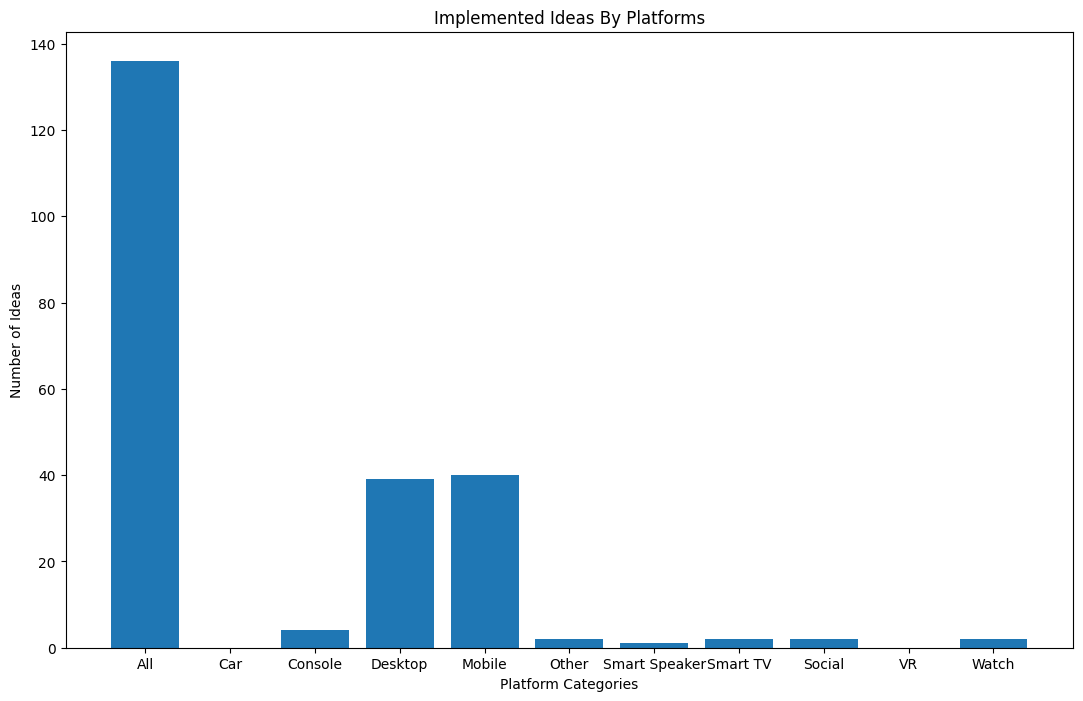

In [87]:
# Plot by Platform Categories
plat_keys = platforms.keys()
plat_values = platforms.values()

plt.figure(figsize=(13,8))
plt.bar(plat_keys, plat_values)
plt.title("Implemented Ideas By Platforms")
plt.xlabel("Platform Categories")
plt.ylabel("Number of Ideas")
plt.show()

In [120]:
# Features
features = {}

for i in sorted(org_cate[org_cate['Feature'] == 'Yes'].Original.values):
    features[i] = 0

In [121]:
for idx, i in enumerate(unfiltered_cate_count):
    feat = unfiltered_cate_count.axes[0][idx][0]
    if feat in features:
        features[feat] += i

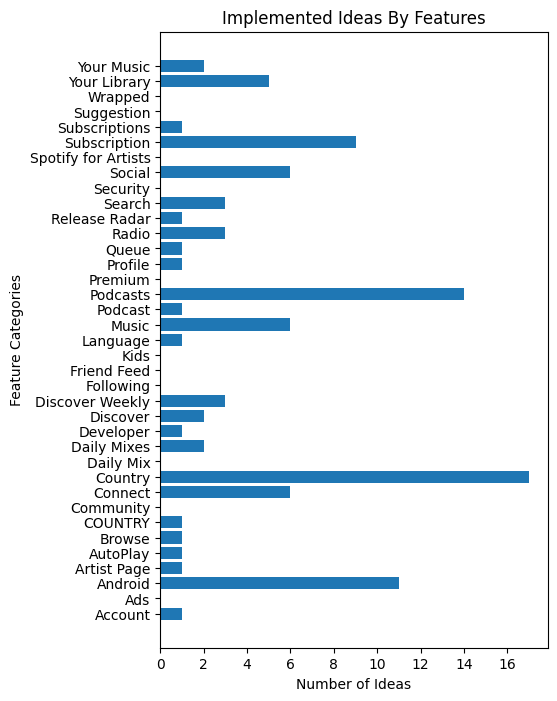

In [131]:
feat_keys = [i for i in features.keys()]
feat_values = [i for i in features.values()]

plt.figure(figsize=(5,8))
plt.barh(feat_keys, feat_values)
plt.title("Implemented Ideas By Features")
plt.ylabel("Feature Categories")
plt.xlabel("Number of Ideas")
plt.show()

Text(0, 0.5, '# of Times')

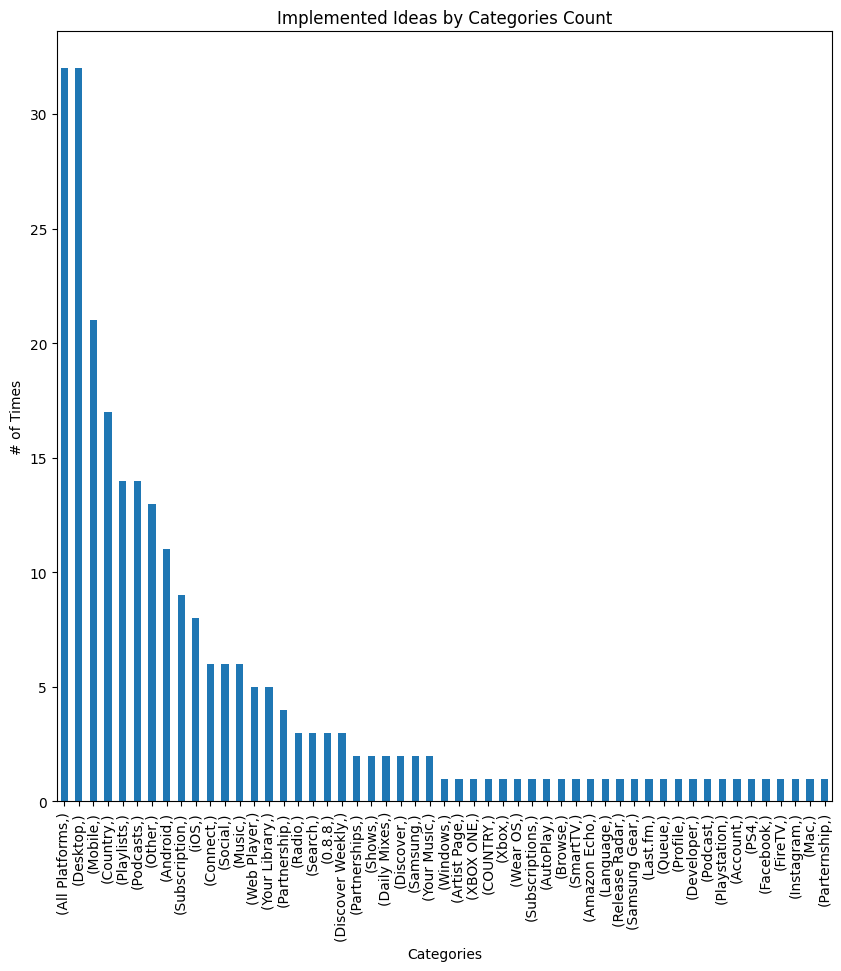

In [13]:
# posts categories
categories = impl_posts.title.str.extractall(r'\[(.*?)\]')

# ax = categories.value_counts().plot(kind='bar', figsize=(30, 15), title='Implemented Ideas by Categories Count')
ax = categories.value_counts().plot(kind='bar', figsize=(10, 10), title='Implemented Ideas by Categories Count')
ax.set_xlabel('Categories')
ax.set_ylabel('# of Times')

In [6]:
categories.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

All Platforms      12.6%
Desktop            12.6%
Mobile              8.3%
Country             6.7%
Playlists           5.5%
Podcasts            5.5%
Other               5.1%
Android             4.3%
Subscription        3.5%
iOS                 3.1%
Connect             2.4%
Social              2.4%
Music               2.4%
Web Player          2.0%
Your Library        2.0%
Partnership         1.6%
Radio               1.2%
Search              1.2%
0.8.8               1.2%
Discover Weekly     1.2%
Partnerships        0.8%
Shows               0.8%
Daily Mixes         0.8%
Discover            0.8%
Samsung             0.8%
Your Music          0.8%
Windows             0.4%
Artist Page         0.4%
XBOX ONE            0.4%
COUNTRY             0.4%
Xbox                0.4%
Wear OS             0.4%
Subscriptions       0.4%
AutoPlay            0.4%
Browse              0.4%
SmartTV             0.4%
Amazon Echo         0.4%
Language            0.4%
Release Radar       0.4%
Samsung Gear        0.4%


Text(0, 0.5, '')

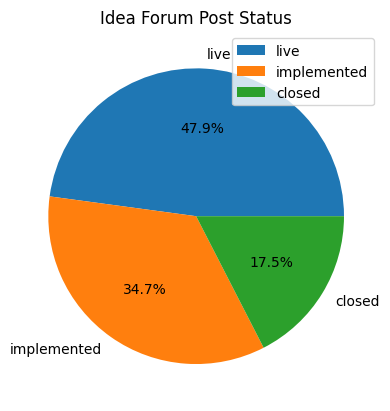

In [7]:
# Idea status distribution
ax = posts.keyword.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, label=None, title='Idea Forum Post Status')
ax.set_ylabel('')

Text(0, 0.5, '# of Times')

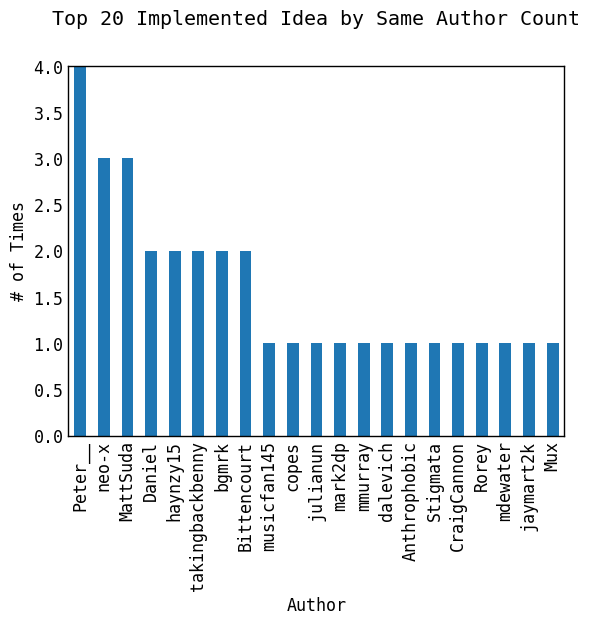

In [233]:
# implemented & author correlation
num_authors = 20
same_author_count = posts[(posts['keyword'] == 'implemented') & (posts['author'] != 'user-removed')].author.value_counts()
ax = same_author_count.iloc[0:num_authors+1].plot(kind='bar', title= 'Top ' + str(num_authors) + ' Implemented Idea by Same Author Count')
ax.set_xlabel('Author')
ax.set_ylabel('# of Times')

In [9]:
same_author_count

Peter__         4
neo-x           3
MattSuda        3
Daniel          2
haynzy15        2
               ..
hugzvieira      1
z-_0zia17qi5    1
mkmkmk          1
gREENNNNN       1
COCCIDIOIDES    1
Name: author, Length: 293, dtype: int64

1    285
2      5
3      2
4      1
Name: author, dtype: int64


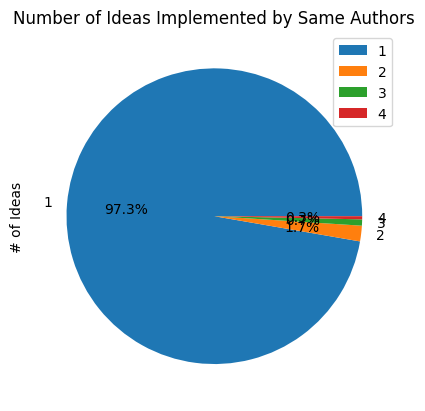

In [10]:
# Percentage distribution of same author ideas implemented N=[1, 2, 3, 4] # of times
ax = same_author_count.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Number of Ideas Implemented by Same Authors')
ax.set_ylabel('# of Ideas')
print(same_author_count.value_counts())

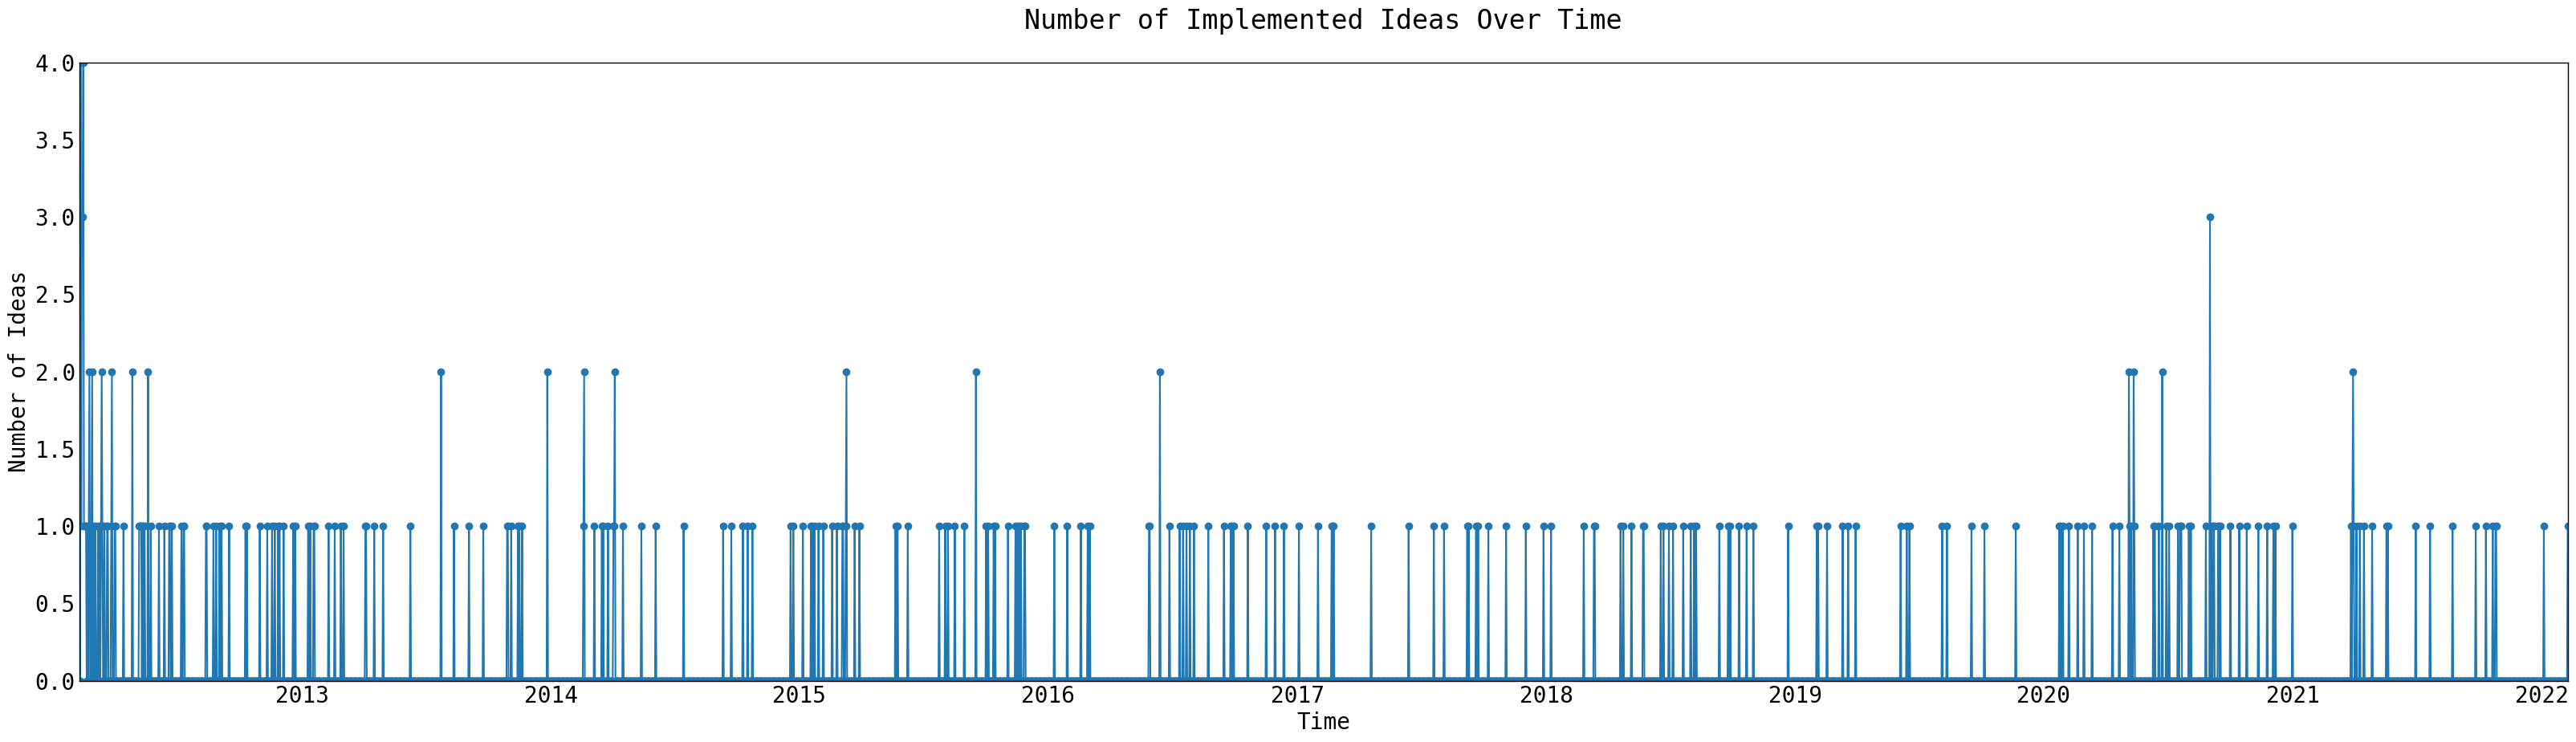

In [217]:
# implemented ideas over time
count_ideas_time = impl_posts.date.value_counts(sort=False)[::-1]
start_d = min(count_ideas_time.axes[0])
end_d = max(count_ideas_time.axes[0])
dates = pd.date_range(start=start_d, end=end_d, freq="D")
ideas_counts = [0] * len(dates)
for idx, d in enumerate(dates):
    date = re.search("20[0-9]{2}-[0-9]{2}-[0-9]{2}", str(d)).group()
    if date in count_ideas_time:
        ideas_counts[idx] = count_ideas_time[date]

plt.figure(figsize=(40,10))
plt.plot(dates, ideas_counts, linestyle='-', marker='o')
plt.title("Number of Implemented Ideas Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Ideas")
plt.show()

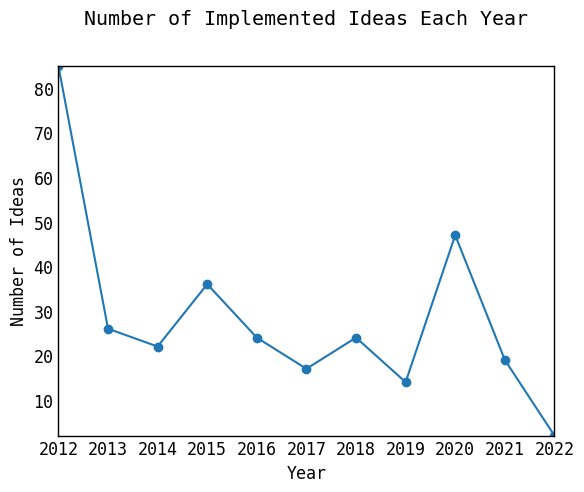

In [251]:
count_ideas_year = impl_posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
year_counts = count_ideas_year.tolist()
years = [count_ideas_year.axes[0][i][0] for i in range(len(count_ideas_year.axes[0]))]
plt.plot(years, year_counts, linestyle='-', marker='o')
plt.title("Number of Implemented Ideas Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Ideas")
plt.show()

In [110]:
all_ideas_year = posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
print('Percentage of Ideas Being Implemented Every Year: ')
print((count_ideas_year/all_ideas_year)*100)

Percentage of Ideas Being Implemented Every Year: 
2012    85.858586
2013    92.857143
2014    73.333333
2015    75.000000
2016    53.333333
2017    48.571429
2018    44.444444
2019    25.000000
2020    54.651163
2021    20.879121
2022     4.347826
2023          NaN
dtype: float64
